# 12.5.1 Principal Components Analysis

In this lab, we perform PCA on the `USArrests` data set, which is part of the base `R` package. The rows of the data set containing the 50 states, in alphabetical order.

In [1]:
states <- row.names(USArrests)
states

[1] "Alabama"        "Alaska"         "Arizona"        "Arkansas"      
 [5] "California"     "Colorado"       "Connecticut"    "Delaware"      
 [9] "Florida"        "Georgia"        "Hawaii"         "Idaho"         
[13] "Illinois"       "Indiana"        "Iowa"           "Kansas"        
[17] "Kentucky"       "Louisiana"      "Maine"          "Maryland"      
[21] "Massachusetts"  "Michigan"       "Minnesota"      "Mississippi"   
[25] "Missouri"       "Montana"        "Nebraska"       "Nevada"        
[29] "New Hampshire"  "New Jersey"     "New Mexico"     "New York"      
[33] "North Carolina" "North Dakota"   "Ohio"           "Oklahoma"      
[37] "Oregon"         "Pennsylvania"   "Rhode Island"   "South Carolina"
[41] "South Dakota"   "Tennessee"      "Texas"          "Utah"          
[45] "Vermont"        "Virginia"       "Washington"     "West Virginia" 
[49] "Wisconsin"      "Wyoming"

The columns of the data set contain the four variables.

In [2]:
names(USArrests)

[1] "Murder"   "Assault"  "UrbanPop" "Rape"

We first briefly examine the data. We notice that the variables have vastly different means.

In [3]:
apply(USArrests, 2, mean)

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Note that the `apply()` function allows us to apply a function&mdash;in this case the `mean()` function&mdash;to each row or column of the data set. The second input here denotes whether we wish to compute the mean of the rows, 1, or the columns, 2. We see that there are on average three times as many rapes as murders, and more than eight times as many assaults as rapes. We can also examine the variances of the four variables using the `apply()` function.

In [4]:
apply(USArrests, 2, var)

Murder    Assault   UrbanPop       Rape 
  18.97047 6945.16571  209.51878   87.72916

Not suprisingly, the variable salso have vastly different variances: the `UrbanPop` variable measures the percentage of the population in each state living in an urban area, which is not a comparable number to the number of rapes in each state per $100,000$ individuals. If we failed to scale the variable sbefore performing PCA, then most of the principal components that we observed would be driven by the `Assault` variable, since it has by far the largest mean and variance. Thus, it is important to standardize the variable sto have mean zero and standard deviation one before performing PCA.

We now perform principal components analysis using the `prcomp()` function, which is one of several functions in `R` that perform PCA.

In [6]:
pr.out <- prcomp(USArrests, scale = TRUE)

By default, the `prcomp()` function centers the variables to have mean zero. By using the option `scale = TRUE`, we scale the variables to have standard deviation one. The output from `precomp()` contains a number of useful quantities.

In [7]:
names(pr.out)

[1] "sdev"     "rotation" "center"   "scale"    "x"

The `center` and `scale` components correspond to the means and standard deviations of the variable sthat were used for scaling prior to implementing PCA.

In [9]:
pr.out$center

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

In [10]:
pr.out$scale

Murder   Assault  UrbanPop      Rape 
 4.355510 83.337661 14.474763  9.366385

The `rotation` matrix provides the principal component loadings; each column of `pr.out$rotation` contains the corresponding principal component loading vector.

In [11]:
pr.out$rotation

,PC1,PC2,PC3,PC4
Murder,-0.5358995,-0.4181809,0.3412327,0.64922780
Assault,-0.5831836,-0.1879856,0.2681484,-0.74340748
UrbanPop,-0.2781909,0.8728062,0.3780158,0.13387773
Rape,-0.5434321,0.1673186,-0.8177779,0.08902432


We see that there are four disticnt principal components. This is to be expected because there are in general $\text{min}(n-1, p)$ informative principal components in a data set with $n$ observations and $p$ variables.

Using the `prcomp()` function, we do not need to explicitly multiply the data by the principal component loading vectors in order to obtain the principal component score vectors. Rather the $50 \times 4$ matrix `x` has as itss columns the principal component score vectors. That is, the $k$ th column is the $k$ th principal component score vector.

In [12]:
dim(pr.out$x)

[1] 50  4

We can plot the first two principal components as follows:

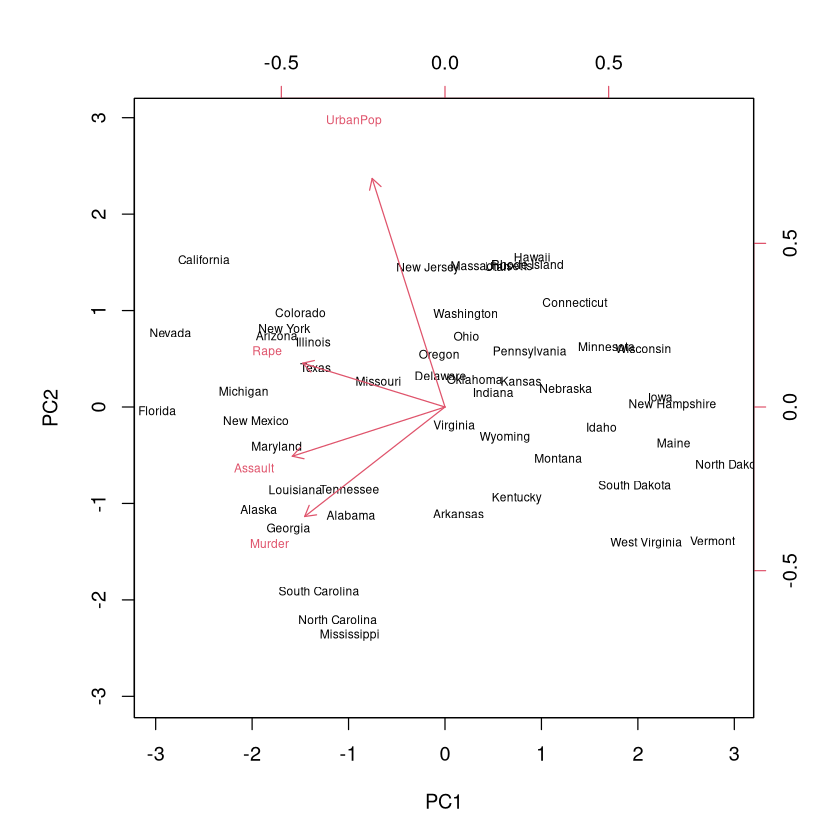

In [14]:
biplot(pr.out, scale = 0, cex=.6)

The `scale = 0` argument to `biplot()` ensures that the arrows are scaled to represent the loadings; other values for `scale` give slightly different biplots with different interpretations.

Notice that this figure is a mirror image of Figure 12.1. Recall that the principal components are only unique up to a sign change, so we can reproduce Figure 12.1 by making a few small changes:

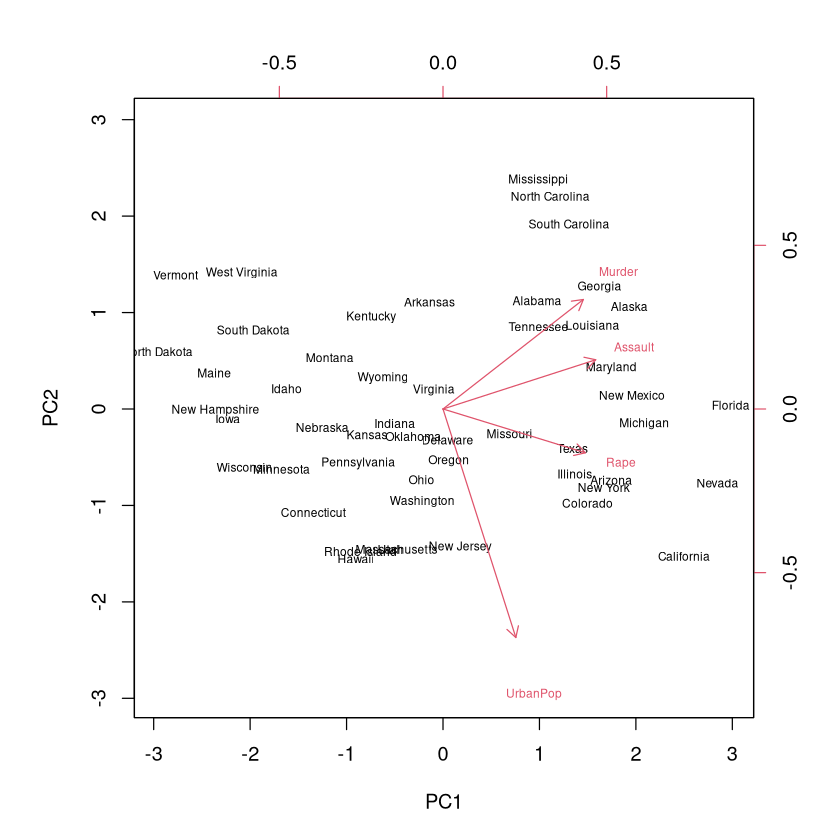

In [15]:
pr.out$rotation = -pr.out$rotation
pr.out$x = -pr.out$x
biplot(pr.out, scale = 0, cex = .6)

The `prcomp()` function also outputs the standard deviation of each princpal component. For instance, on the `USArrests` data set, we can access these standard deviations as follows:

In [16]:
pr.out$sdev

[1] 1.5748783 0.9948694 0.5971291 0.4164494

The variance explained by each principal component is obtained by squareing these:

In [17]:
pr.var <- pr.out$sdev^2
pr.var

[1] 2.4802416 0.9897652 0.3565632 0.1734301

To compute the proportion of variance explained by each principal component, we simply divide the variance explained by each principal component by the total variance explained by all four principal components:

In [18]:
pve <- pr.var / sum(pr.var)
pve

[1] 0.62006039 0.24744129 0.08914080 0.04335752

We see that the first principal component explains $62.0\%$ of the cariance in the data, the next principal component explains $24.7\%$ of the variance, and so forth. We can plot the PVE explained by each component, as well as the cumulative PVE, as follows:

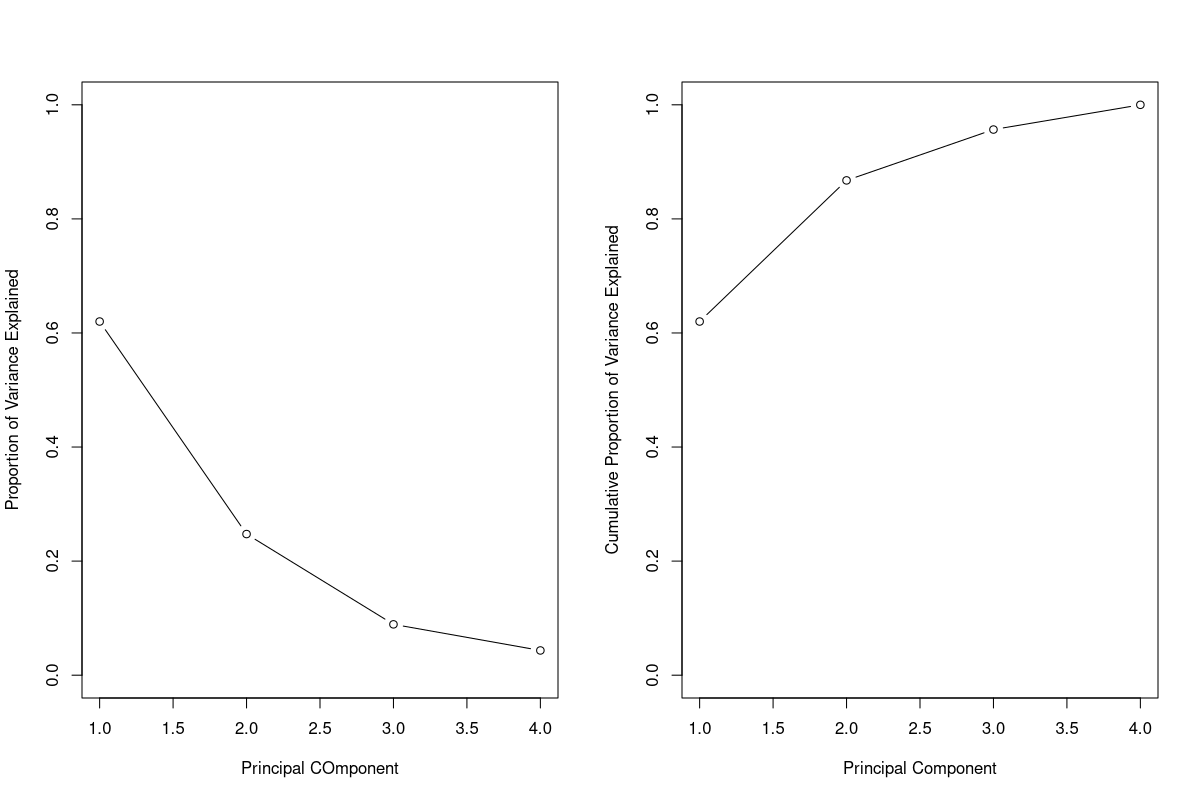

In [23]:
par(mfrow = c(1, 2))
options(repr.plot.width = 12, repr.plot.height = 8)
plot(pve, xlab = "Principal COmponent",
     ylab = "Proportion of Variance Explained", ylim = c(0, 1),
     type = "b")
plot(cumsum(pve), xlab = "Principal Component",
     ylab = "Cumulative Proportion of Variance Explained",
     ylim = c(0, 1), type = "b")

The result is showin in Figure 12.3. Note that the function `cumsum()` computes the cumulative sum of the elements of a numeric vector. For instance:

In [24]:
a <- c(1, 2, 8, -3)
cumsum(a)

[1]  1  3 11  8